#Googletrends Galaxus Produkte

Im Interview mit dem Mediensprecher von Galaxus nannte dieser einige Produkte, die im Zusammenhang mit der Ukraine Krise spannend zu analysieren sind. Es sind dies:
- Schlafsack
- Gaskocher
- Kompass


In [1]:
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=16957c78cd5a5eb3d601478385367bd01af86aa64db4b0c61d80daeaa5391de7
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


Pytrends ist eine API, um Googlesuchtrends zu analysieren.

In [2]:
from pytrends.request import TrendReq
pytrends = TrendReq (hl='de-CH')

In [3]:
all_keywords = ['Schlafsack', 'Gaskocher', 'Kompass']
cat ='0'
geo = 'CH'
timeframe='today 3-m'
gprop=''
pytrends.build_payload(all_keywords, 
                       cat, 
                       timeframe, 
                       geo, 
                       gprop)

Mit dem oberen Code connecten wir uns mit Google. Dabei definieren wir mit "hl" die hostlanguage Deutsch (Schweiz). Ausserdem definieren wir die Keywords Schlafsack, Gaskocher und Kompass. Dabei interessieren uns die Suchbegriffe in der Schweiz und der Zeitraum von heute bis 3 Monate zurück.

In [4]:
data = pytrends.interest_over_time()
data

,Schlafsack,Gaskocher,Kompass,isPartial
date,,,,
2022-02-04,32,0,8,False
2022-02-05,10,10,29,False
2022-02-06,36,9,63,False
2022-02-07,52,0,22,False
2022-02-08,23,7,37,False
...,...,...,...,...
2022-04-28,92,8,8,False
2022-04-29,26,25,38,False
2022-04-30,0,0,0,False


Der Befehl pytrends.interest_over_time() gibt ein Pandas-Datenframe zurück, das historische Daten enthält, wann das Schlüsselwort am häufigsten gesucht wurde.

In [5]:
print(data.head(89))

            Schlafsack  Gaskocher  Kompass  isPartial
date                                                 
2022-02-04          32          0        8      False
2022-02-05          10         10       29      False
2022-02-06          36          9       63      False
2022-02-07          52          0       22      False
2022-02-08          23          7       37      False
...                ...        ...      ...        ...
2022-04-28          92          8        8      False
2022-04-29          26         25       38      False
2022-04-30           0          0        0      False
2022-05-01          62         61        0      False
2022-05-02           0          0        0       True

[88 rows x 4 columns]


In [6]:
import matplotlib.pyplot as plt

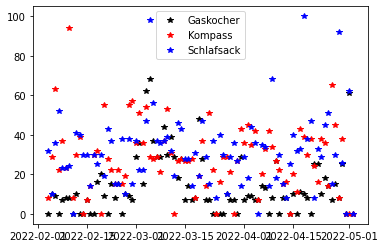

In [7]:
plt.figure()
plt.plot(data.index,data.Gaskocher,'k*')
plt.plot(data.index,data.Kompass,'r*')
plt.plot(data.index,data.Schlafsack,'b*')
plt.legend(['Gaskocher','Kompass','Schlafsack'])

Bei der Analyse der Daten fällt auf, dass die Werte immer zwischen 0 und 100 liegen. Dies zeigt nicht an, wie oft ein Suchbegriff eingegeben wurde, sondern der relative Wert der Suchanfrage. Es zeigt das Verhältnis des eingegeben Suchbegriffes allen in diesem Zeitraum getätigten Suchbegriffe an

In [8]:
pytrends.build_payload(kw_list=['Kompass'], timeframe='today 3-m', geo='CH')
df_rt = pytrends.related_topics()

In [9]:
print(df_rt['Kompass']['rising'].head(5))

   value formattedValue                                               link  \
0    250         + 250%   /trends/explore?q=/m/06m_p&date=today+3-m&geo=CH   
1    200         + 200%  /trends/explore?q=/m/01cf0p&date=today+3-m&geo=CH   
2    130         + 130%  /trends/explore?q=/m/027lnzs&date=today+3-m&ge...   
3    110         + 110%  /trends/explore?q=/m/0h94y36&date=today+3-m&ge...   

    topic_mid      topic_title       topic_type  
0    /m/06m_p            Sonne            Stern  
1   /m/01cf0p  Himmelsrichtung  Studienrichtung  
2  /m/027lnzs           iPhone     Mobiltelefon  
3  /m/0h94y36       Mobile App            Thema  


In [10]:
df_rq = pytrends.related_queries()

In [11]:
print(df_rq)

{'Kompass': {'top':                  query  value
0       kompass online    100
1  der goldene kompass     92
2    kompass solothurn     46, 'rising':                query  value
0  kompass solothurn     60}}


Der Unterschied zwischen related queries und related topics ist, dass related queries verwante Suchanfragen sind und related topics nicht unbedingt das Wort selbst enthalten müssen, sondern in einem Bezug zu diesem stehen.

In [12]:
pytrends.trending_searches (pn='switzerland')

,0
0,Tagesschau
1,Katie Holmes
2,Jil Teichmann
3,Thomas Müller
4,Kaia Gerber
5,Azovstal
6,Liverpool
7,Swisscom
8,Villarreal gegen Liverpool
9,Met Gala 2022 theme


Zeigt die aktuellen Suchtrends, Stichtag heute